In [41]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize':(10,6)})

model_name = 'low_mass_to_5_wider'

In [42]:
losses = torch.load(f'saved_model_params/refined_model/{model_name}_losses.pt')
print(losses)

[9.640254974365234, 7.61977481842041, 5.588108539581299, 3.9930150508880615, 2.6512739658355713, 1.5430138111114502, 0.7493778467178345, 0.3372202217578888, 0.29126593470573425, 0.5010644197463989, 0.699042797088623, 0.6576254963874817, 0.4537122845649719, 0.25664767622947693, 0.16577361524105072, 0.17421391606330872, 0.21006207168102264, 0.23194584250450134, 0.22990591824054718, 0.20774319767951965, 0.1744111031293869, 0.14802268147468567, 0.14132684469223022, 0.14802441000938416, 0.15602733194828033, 0.160538911819458, 0.15976497530937195, 0.1508002132177353, 0.13627976179122925, 0.12503308057785034, 0.12220494449138641, 0.125726118683815, 0.13069573044776917, 0.13317523896694183, 0.1314912587404251, 0.1264421045780182, 0.12003307789564133, 0.11477331817150116, 0.11181505024433136, 0.11021752655506134, 0.11048682034015656, 0.10781564563512802, 0.10881295800209045, 0.10842100530862808, 0.10596766322851181, 0.10469752550125122, 0.10204656422138214, 0.10165753215551376, 0.10160018503665

c:\Users\Vince\anaconda3\envs\wise_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Vince\anaconda3\envs\wise_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Loss')

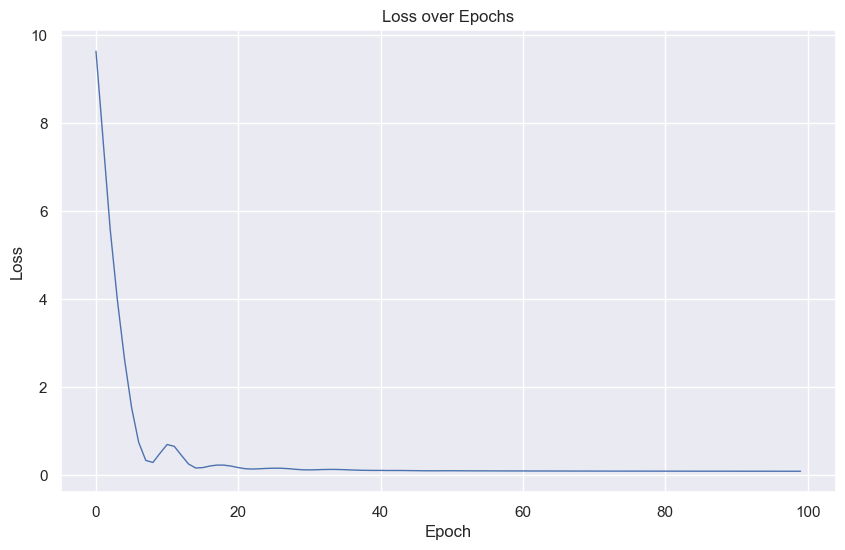

In [43]:
ax = sns.lineplot(losses, linewidth=1)
ax.set_title('Loss over Epochs')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')


# Model Performance Visualizations

In [44]:
# Setup Model
from models.refined_model import GCN as GCN_Refined
from models.model import GCN

# model = GCN()
model = GCN_Refined(
    input_channels=2, output_channels=1, hidden_channels=2**5, num_hidden=4
)
model.load_state_dict(torch.load(f"saved_model_params/refined_model/{model_name}.pt"))
model = model.eval()
print(model)

RuntimeError: Error(s) in loading state_dict for GCN:
	Missing key(s) in state_dict: "gconv_layers.2.lin_l.weight", "gconv_layers.2.lin_l.bias", "gconv_layers.2.lin_r.weight", "gconv_layers.4.weight", "gconv_layers.4.bias", "gconv_layers.4.running_mean", "gconv_layers.4.running_var", "gconv_layers.5.lin_l.weight", "gconv_layers.5.lin_l.bias", "gconv_layers.5.lin_r.weight", "gconv_layers.7.weight", "gconv_layers.7.bias", "gconv_layers.7.running_mean", "gconv_layers.7.running_var", "gconv_layers.8.lin_l.weight", "gconv_layers.8.lin_l.bias", "gconv_layers.8.lin_r.weight", "gconv_layers.10.weight", "gconv_layers.10.bias", "gconv_layers.10.running_mean", "gconv_layers.10.running_var", "gconv_layers.11.lin_l.weight", "gconv_layers.11.lin_l.bias", "gconv_layers.11.lin_r.weight". 
	Unexpected key(s) in state_dict: "gconv_layers.2.weight", "gconv_layers.2.bias", "gconv_layers.2.running_mean", "gconv_layers.2.running_var", "gconv_layers.2.num_batches_tracked", "gconv_layers.3.lin_l.weight", "gconv_layers.3.lin_l.bias", "gconv_layers.3.lin_r.weight", "gconv_layers.5.weight", "gconv_layers.5.bias", "gconv_layers.5.running_mean", "gconv_layers.5.running_var", "gconv_layers.5.num_batches_tracked", "gconv_layers.6.lin_l.weight", "gconv_layers.6.lin_l.bias", "gconv_layers.6.lin_r.weight", "gconv_layers.8.weight", "gconv_layers.8.bias", "gconv_layers.8.running_mean", "gconv_layers.8.running_var", "gconv_layers.8.num_batches_tracked", "gconv_layers.9.lin_l.weight", "gconv_layers.9.lin_l.bias", "gconv_layers.9.lin_r.weight", "gconv_layers.11.weight", "gconv_layers.11.bias", "gconv_layers.11.running_mean", "gconv_layers.11.running_var", "gconv_layers.11.num_batches_tracked", "gconv_layers.12.lin_l.weight", "gconv_layers.12.lin_l.bias", "gconv_layers.12.lin_r.weight". 

In [ ]:
data = torch.load("datasets/low_range/SG256_0_SM_5.pt")

y_truth = np.array([])
y_pred = np.array([])
dm_mass = np.array([])
redshift = np.array([])
for graph in data:
    graph.x = torch.tensor([[data[0], data[1]] for data in graph.x])

    # Logspace calcs
    graph.y = torch.log10(graph.y)
    graph.x[:, 0] = torch.log10(graph.x[:, 0])

    for item in graph.y:
        y_truth = np.append(y_truth, item)

    for item in graph.x:
        dm_mass = np.append(dm_mass, item[0])
        redshift = np.append(redshift, item[1])

    out = model(graph)
    for item in out.tolist():
        y_pred = np.append(y_pred, item[0])

# unlogspace
# y_truth = 10 ** y_truth
# y_pred = 10 ** y_pred

print(len(y_pred), "total halo snapshots")

16949 total halo snapshots


In [ ]:
import scipy.stats
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import r2_score


def create_hexplot(
    x_bins: int,
    y_bins: int,
    x: any,
    y: any,
    x_label: str,
    y_label: str,
    title: str,
    display_stats: bool,
    display_yeqx: bool,
    median_std_overlay: bool = True,
    reverse_x: bool = False,
):
    # Create hexbin plot with custom color palette
    g = sns.color_palette(["lightgray", "darkgray", "black"])
    cmap_g = LinearSegmentedColormap.from_list("custom_gray_to_black", g)
    plt.hexbin(x, y, gridsize=(x_bins, y_bins), cmap=cmap_g, mincnt=1)

    # Create mean/std overlay
    if median_std_overlay:
        # Calculate median and standard deviation of Y values for each X bin
        x_bins_edges = np.linspace(min(x), max(x), x_bins + 1)
        y_median = [np.median(y[(x >= x_bins_edges[i]) & (x < x_bins_edges[i + 1])]) for i in range(x_bins)]
        y_std = [np.std(y[(x >= x_bins_edges[i]) & (x < x_bins_edges[i + 1])]) for i in range(x_bins)]
        x_bins_centers = 0.5 * (x_bins_edges[:-1] + x_bins_edges[1:])

        # Plot median and standard deviation as continuous functions
        plt.plot(x_bins_centers, y_median, color='turquoise', label='Median of Y')
        plt.fill_between(x_bins_centers, np.array(y_median) - np.array(y_std), np.array(y_median) + np.array(y_std), color='turquoise', alpha=0.3, label='Std Dev of Y')

    # Title
    plt.title(title, fontsize=22)

    # Create colorbar
    cbar = plt.colorbar()
    cbar.set_label("Number of Halo Snapshots", fontsize=18)
    cbar.ax.tick_params(labelsize=18)

    # Label axes
    plt.xlabel(x_label, fontsize=18, labelpad=15)
    if reverse_x:
        plt.gca().invert_xaxis()
    plt.ylabel(y_label, fontsize=18, labelpad=15)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # Plot perfect predictions line y=x
    if display_yeqx:
        plt.plot([2, 5], [2, 5], ls="--", c="0")
        plt.legend(["Perfect Predictions"], loc="lower right", fontsize=14)

    plt.tight_layout()
    # plt.savefig("./images/figure1.pdf", dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    if display_stats:
        residuals = x - y
        print(f"Pearson correlation: {scipy.stats.pearsonr(x, y)}")
        print(f"MSE:  {np.mean(residuals**2)}")
        print(f"Mean absolute error: {np.mean(np.abs(residuals))} dex")
        print(f"Scatter: {scipy.stats.tstd(residuals)} dex")
        print(f"Bias: {np.mean(residuals)} dex")
        print(f"R^2: {r2_score(y_true=x, y_pred=y)}")

c:\Users\Vince\anaconda3\envs\wise_env\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Vince\anaconda3\envs\wise_env\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Vince\anaconda3\envs\wise_env\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Vince\anaconda3\envs\wise_env\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Vince\anaconda3\envs\wise_env\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


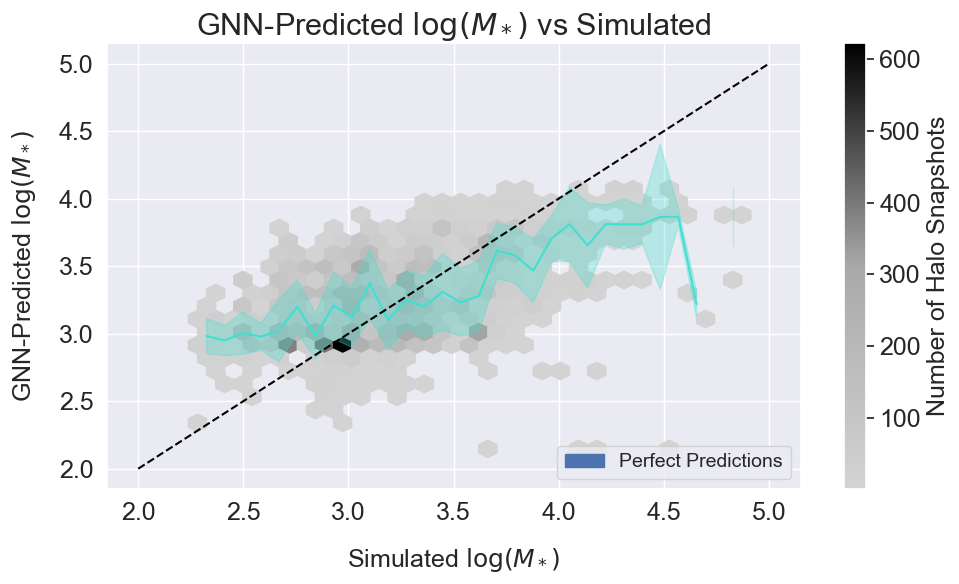

Pearson correlation: PearsonRResult(statistic=0.45951627800163675, pvalue=0.0)
MSE:  0.12582548655520764
Mean absolute error: 0.28540026998792795 dex
Scatter: 0.34676061669964847 dex
Bias: -0.07476399974405495 dex
R^2: 0.10240968749574864


In [ ]:
create_hexplot(30, 10, y_truth, y_pred, "Simulated $\log(M_*)$", "GNN-Predicted $\log(M_*)$", "GNN-Predicted $\log(M_*)$ vs Simulated", True, True)

c:\Users\Vince\anaconda3\envs\wise_env\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Vince\anaconda3\envs\wise_env\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Vince\anaconda3\envs\wise_env\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Vince\anaconda3\envs\wise_env\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Vince\anaconda3\envs\wise_env\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


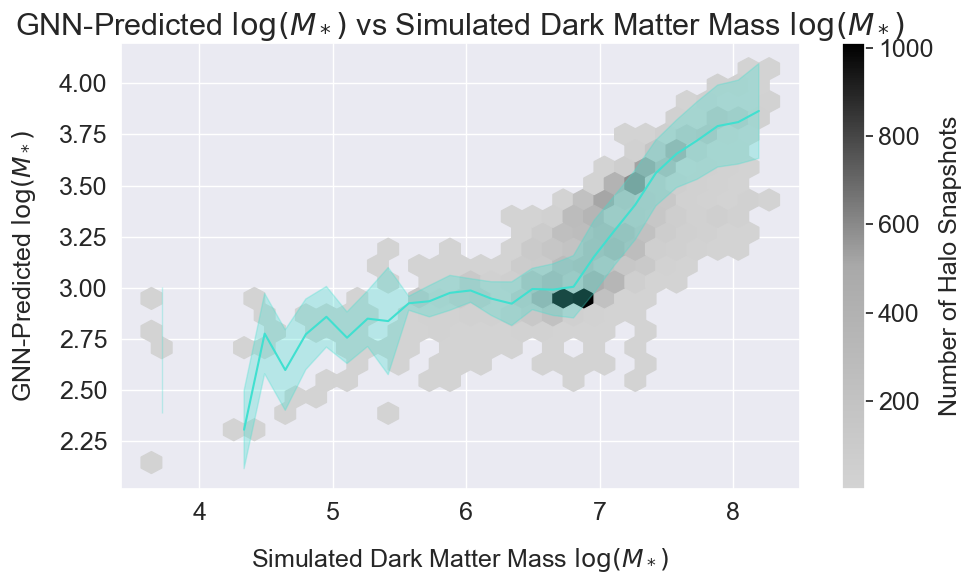

In [ ]:
create_hexplot(30, 12, dm_mass, y_pred, "Simulated Dark Matter Mass $\log(M_*)$", "GNN-Predicted $\log(M_*)$", "GNN-Predicted $\log(M_*)$ vs Simulated Dark Matter Mass $\log(M_*)$", False, False)

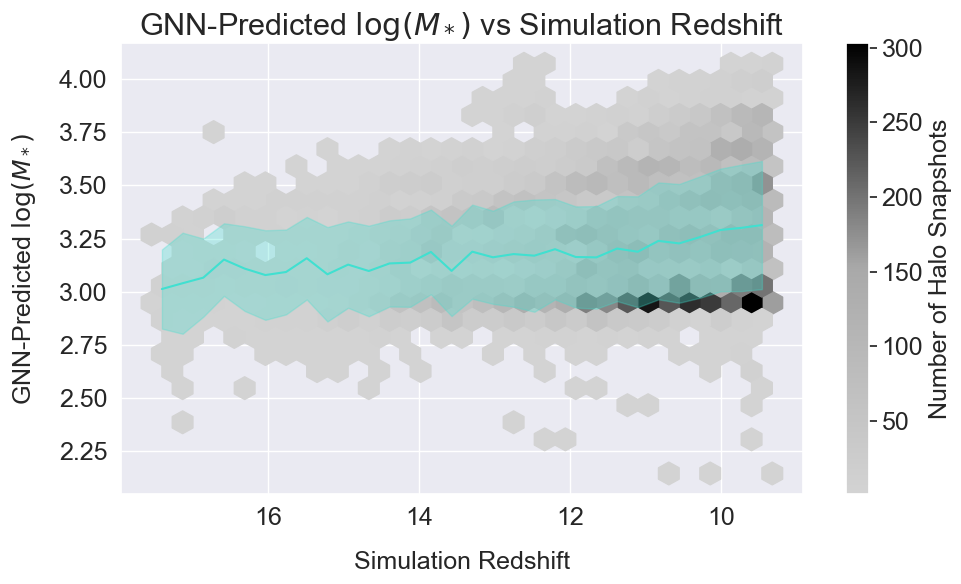

In [ ]:
create_hexplot(30, 12, redshift, y_pred, "Simulation Redshift", "GNN-Predicted $\log(M_*)$", "GNN-Predicted $\log(M_*)$ vs Simulation Redshift", False, False, True, True)

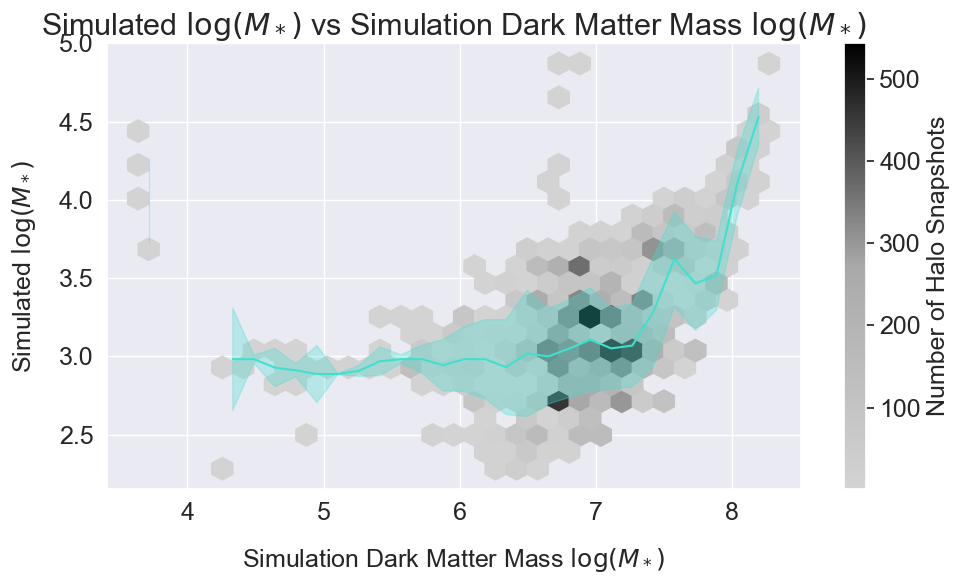

In [ ]:
create_hexplot(30, 12, dm_mass, y_truth, "Simulation Dark Matter Mass $\log(M_*)$", "Simulated $\log(M_*)$", "Simulated $\log(M_*)$ vs Simulation Dark Matter Mass $\log(M_*)$", False, False)

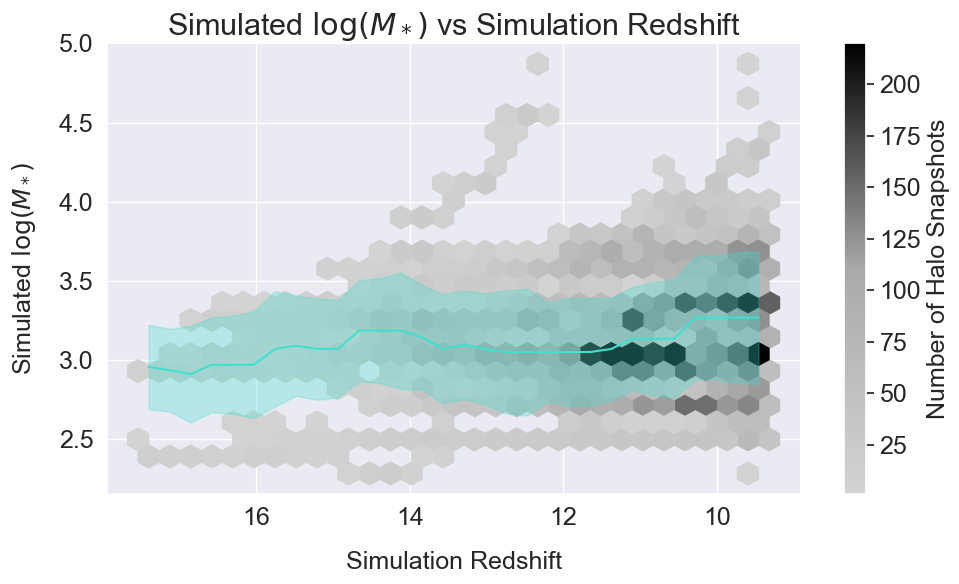

In [ ]:
create_hexplot(30, 12, redshift, y_truth, "Simulation Redshift", "Simulated $\log(M_*)$", "Simulated $\log(M_*)$ vs Simulation Redshift", False, False, True, True)